# Notebook Usability Test (15 minutes)

**Purpose:** Evaluate core notebook workflows: opening a file, selecting a kernel, running cells in sequence, organizing and navigating, working with cell types, and using magics.
---


## 0) Setup & Kernel Check
**Task:** Make sure the notebook is using a Python kernel and that you can execute a simple cell.

In [1]:
import sys, platform
print("✅ Python executable:", sys.executable)
print("✅ Python version:", sys.version.split()[0])
print("✅ Platform:", platform.platform())
print("Tip: If this cell fails, check the **Kernel** in the toolbar and switch to Python 3.")

✅ Python executable: /Users/rodrigosilvaferreira/.pyenv/versions/3.13.0/bin/python
✅ Python version: 3.13.0
✅ Platform: macOS-15.6-arm64-arm-64bit-Mach-O
Tip: If this cell fails, check the **Kernel** in the toolbar and switch to Python 3.


## 1) Run Cells in Sequence

**Task:** Run the following cells **from top to bottom**. Then try **Run All Above** and **Run All Below**.

In [2]:
# 1A. Define a configuration value (used later)
DATA_POINTS = 7
print("Configured to generate", DATA_POINTS, "data points.")

Configured to generate 7 data points.


In [3]:
# 1B. Create a tiny dataset that depends on DATA_POINTS
import math
from datetime import datetime, timedelta

now = datetime.now()
xs = list(range(DATA_POINTS))
ys = [round(math.sin(i/2), 3) for i in xs]
ts = [now + timedelta(minutes=i) for i in xs]

print("Generated", len(xs), "rows.")

Generated 7 rows.


In [4]:
# 1C. Summarize (depends on xs/ys/ts above)
avg = sum(ys)/len(ys)
mx = max(ys)
mn = min(ys)
summary = {"count": len(ys), "avg": round(avg,3), "max": mx, "min": mn}
summary

{'count': 7, 'avg': 0.566, 'max': 0.997, 'min': 0.0}

In [7]:
# 1D. Intentional dependency: this will FAIL if you didn't run 1A–1C first.
assert 'summary' in globals(), "Run cells 1A–1C first (or try **Run All Above**)"
print("✅ Dependent step finished. Summary:", summar)

NameError: name 'summar' is not defined

## 2) Cell Types: Code, Markdown, and Raw (2 min)

**Task:** Convert the next cell to **Markdown**, then back to **Code**. Add a **new cell** below this section.

- *Question:* “Can you tell me what you think the **Outline** view does?” (if they notice it)
- *Question:* “What distinction do you see between code, raw, and markdown cells?”


In [8]:
# Display a greeting message
message = "Hello from a code cell 👋"
print(message)

Hello from a code cell 👋


## 3) Organize & Navigate (2–3 min)

**Task:** Use headings to navigate. If your environment supports an **Outline**/**Table of Contents**, try it now.

- Find the section **“Mini Analysis (run as a group)”**.
- Try to **run all cells in that section** with one action if supported.
- Try **dragging cells** to reorder them.

- *Question:* “Does the Outline help? Would you expect to run a whole section from there?”
- *Question:* “Do you see controls for hiding inputs/outputs or collapsing sections?”


### Mini Analysis (run as a group)

We’ll create a tiny DataFrame and do a quick calculation. Try **running all cells in this subsection at once** if possible.


In [12]:
import pandas as pd
df = pd.DataFrame({"x": xs, "y": ys, "t": ts})
df.head()

,x,y,t
0,0,0.000,2025-08-13 11:09:39.002608
1,1,0.479,2025-08-13 11:10:39.002608
2,2,0.841,2025-08-13 11:11:39.002608
3,3,0.997,2025-08-13 11:12:39.002608
4,4,0.909,2025-08-13 11:13:39.002608


In [13]:
# Compute a rolling window to create a small dependency chain
roll = df['y'].rolling(3, min_periods=1).mean().round(3)
roll.head(10)

0    0.000
1    0.240
2    0.440
3    0.772
4    0.916
5    0.835
6    0.549
Name: y, dtype: float64

In [14]:
# Join and summarize
df2 = df.assign(y_roll=roll)
out = df2.describe().T[['mean','std','min','max']].round(3)
out

,mean,std,min,max
x,3.0,2.160247,0.0,6.0
y,0.566429,0.384839,0.0,0.997
t,2025-08-13 11:12:39.002607872,NaN,2025-08-13 11:09:39.002608,2025-08-13 11:15:39.002608
y_roll,0.536,0.33511,0.0,0.916


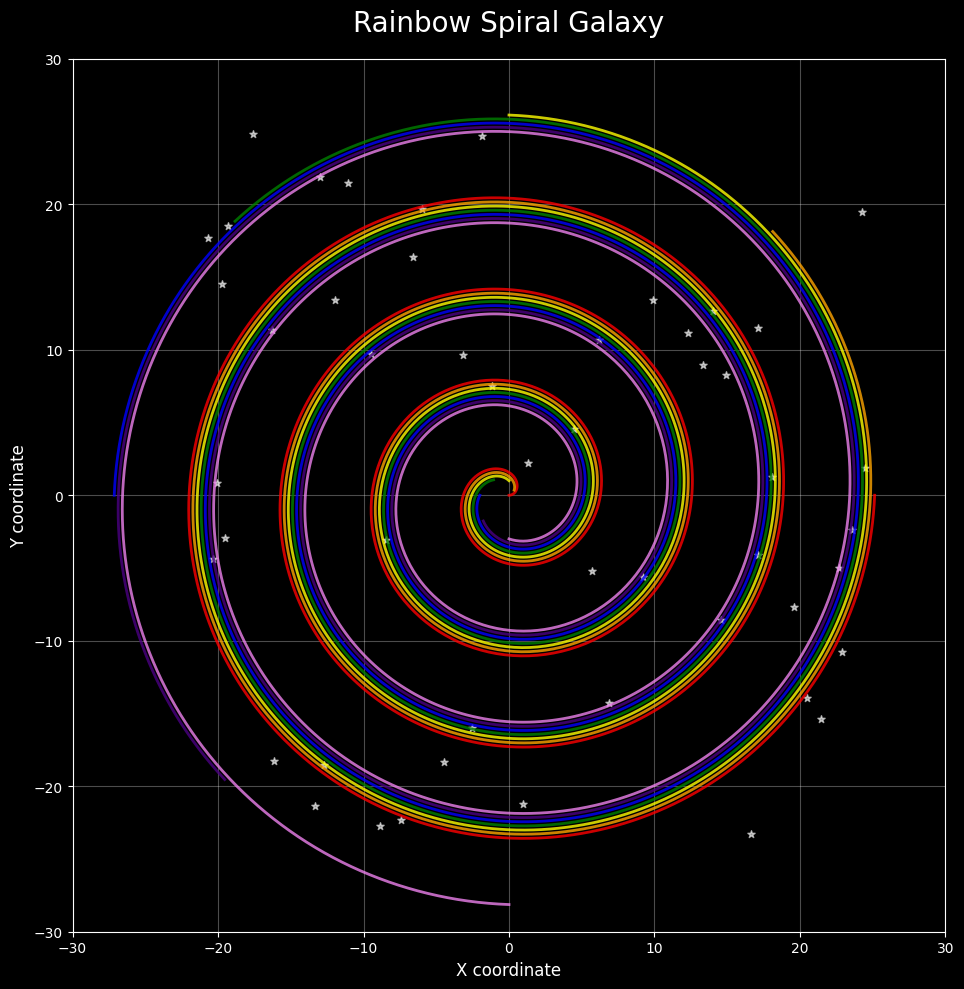

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 10))

theta = np.linspace(0, 8*np.pi, 1000)
r = theta

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for i, color in enumerate(colors):
    offset = i * np.pi/4
    x = (r + i*0.5) * np.cos(theta + offset)
    y = (r + i*0.5) * np.sin(theta + offset)
    ax.plot(x, y, color=color, linewidth=2, alpha=0.8)

n_stars = 50
star_x = np.random.uniform(-25, 25, n_stars)
star_y = np.random.uniform(-25, 25, n_stars)
ax.scatter(star_x, star_y, c='white', s=30, alpha=0.6, marker='*')

ax.set_aspect('equal')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_title('Rainbow Spiral Galaxy', fontsize=20, pad=20)
ax.grid(True, alpha=0.3)
ax.set_xlabel('X coordinate', fontsize=12)
ax.set_ylabel('Y coordinate', fontsize=12)

plt.tight_layout()
plt.show()